In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 개요

(Eric Ma - *Network Analysis Made Simple* 책을 참고했습니다)

---

마블 세계관(Marvel Universe)에는 정말 다양한 캐릭터가 존재합니다. 그 중에서도 **어벤져스 시리즈**는 세계관의 거의 모든 슈퍼히어로들이 등장하는 거대한 스케일의 작품이라고 할 수 있는데요, 이 노트북에서는 간단한 **네트워크 분석**을 통해 다양한 캐릭터들의 **상호작용**을 파악해보고자 합니다. 등장 인물들간의 상호작용을 고려하기 위해, 동일한 씬(scene)에서 특정한 두 인물 간 대화를 주고 받은 횟수를 상호작용의 지표로 가정하고 데이터를 수집했습니다.

네트워크 분석을 진행하기 위해 각 시리즈 별로 등장인물이 노드(node)로 정의되며 각 등장인물간 대화 횟수가 엣지(edge)로 구성되는 그래프 데이터를 사용합니다.

# 노드/엣지 정의

In [2]:
# 엣지
edge_1 = pd.read_csv("./Data/avengers1.csv")
edge_2 = pd.read_csv("./Data/avengers2.csv")
edge_3 = pd.read_csv("./Data/avengers3.csv")
edge_4 = pd.read_csv("./Data/avengers4.csv")

edges = pd.concat([edge_1, edge_2, edge_3, edge_4])  # 데이터프레임 통합

# 노드
characters = set(list(edges.Target) + list(edges.Source))
nodes = pd.DataFrame({"id": list(characters), "Label": list(characters)})
print("전체 등장 인물 수: {}".format(len(characters)))

전체 등장 인물 수: 125


In [3]:
edges.head()

,Source,Target,Type,weight,series
0,CAPTAIN AMERICA,BLACK WIDOW,Undirected,29,1
1,THOR,LOKI,Undirected,28,1
2,NICK FURY,CAPTAIN AMERICA,Undirected,22,1
3,NICK FURY,LOKI,Undirected,15,1
4,CAPTAIN AMERICA,THOR,Undirected,15,1


통합된 데이터프레임은 총 5개의 칼럼으로 이루어져 있는데요, 각 칼럼을 간단하게 설명하자면 다음과 같습니다.

- `Source`와 `Target`은 엣지로 연결될 두개의 노드를 의미합니다. 
- `Type` 칼럼의 엔트리는 전부 Undirected로 설정되어 있는데, 이는 두 노드 간 방향성이 없음을 표시하기 위해 일부러 명시해놓았습니다 (대화는 항상 쌍방향적이기 때문에 Directed Graph를 정의할 수는 없습니다). 
- `weight` 칼럼은 특정한 두 인물간 대화 횟수를 의미합니다. 이는 노드간의 엣지 가중치로 사용될 것입니다.
- `series` 칼럼은 어벤져스 시리즈의 순서를 의미합니다. 예를 들어, 4는 어벤져스 엔드게임을 의미합니다.


In [4]:
# 전체 등장인물 리스트
nodes.id.unique()

array(['NEBULA', 'JOE RUSSO', 'RHODEY', 'SECURITY OFFICER', 'HAPPY',
       'SELVIG', 'PROXIMA MIDNIGHT', 'HELMSMAN',
       'ASGARDIAN SOLDIER (2013)', 'MORGAN STARK', 'EBONY MAW',
       'SPIDERMAN', "M'BAKU", 'SENATOR BOYNTON', 'FRIDAY', 'PEPPER POTTS',
       'CASSIE LANG', 'JIM STARLIN', 'ATTENDING WOMAN', 'DOCTOR STRANGE',
       'FALCON', 'OLD MAN', 'SHIELD BASE VOICE', 'ULTRON', 'HOWARD STARK',
       'FRIGGA', 'STONEKEEPER', 'OKOYE', 'IRON LEGION',
       'THE ANCIENT ONE (2012)', 'MADAME B', 'HULK', 'GIRL',
       'NATHANIEL BARTON', 'VALKYRIE', 'SOLDIERS', 'SECRETARY ROSS',
       'COOPER BARTON', 'PEGGY CARTER', 'POLICE SERGEANT',
       'CULL OBSIDIAN', 'THANOS', 'BALLET INSTRUCTOR', 'EDWIN JARVIS',
       'PILOT', 'JABARI WARRIORS', 'ROCKET', 'GROOT', 'SHURI',
       'BRUCE BANNER', 'STAN LEE', 'COULSON', "GAMORA'S MOTHER",
       'SHIELD AGENT', 'BUCKY BARNES', 'ANTMAN', 'HEIMDALL', 'RED SKULL',
       'CAROL DANVERS', 'SITWELL', 'THOR', 'BOY', 'THE OTHER',
       'CHILD

# 그래프 정의

---

엔드게임의 각 시리즈별로 개별적인 그래프 객체를 생성하도록 하겠습니다.

In [5]:
# 엣지 가중치를 고려해 그래프 객체 생성
graphs = [nx.from_pandas_edgelist(edges[edges.series==i], 
                                  source='Source', 
                                  target='Target', 
                                  edge_attr=['weight']) for i in range(1, 5)]

In [6]:
graphs

In [7]:
# 모든 등장인물 간의 상호작용
relationships = list(graphs[0].edges(data=True))
relationships[0:12]

[('CAPTAIN AMERICA', 'BLACK WIDOW', {'weight': 29}),
 ('CAPTAIN AMERICA', 'NICK FURY', {'weight': 22}),
 ('CAPTAIN AMERICA', 'THOR', {'weight': 15}),
 ('CAPTAIN AMERICA', 'COULSON', {'weight': 10}),
 ('CAPTAIN AMERICA', 'HAWKEYE', {'weight': 8}),
 ('CAPTAIN AMERICA', 'POLICE SERGEANT', {'weight': 1}),
 ('CAPTAIN AMERICA', 'YOUNG COP', {'weight': 1}),
 ('CAPTAIN AMERICA', 'PILOT', {'weight': 1}),
 ('CAPTAIN AMERICA', 'PEGGY CARTER', {'weight': 1}),
 ('BLACK WIDOW', 'COULSON', {'weight': 14}),
 ('BLACK WIDOW', 'SELVIG', {'weight': 5}),
 ('BLACK WIDOW', 'NICK FURY', {'weight': 4})]

# 분석1: 특정 캐릭터의 상호작용 파악하기

- 특정한 시리즈에서 한 캐릭터가 다른 캐릭터들과 어느 정도의 강도로 상호작용을 했는지를 파악해봅시다.

In [8]:
def character_interactions(edges, series_no:int, name:str):
    """특정 시리즈에서 한 캐릭터가 다른 캐릭터들과 상호작용한 횟수를 파악하기 위한 함수
    
    Returns
    ----------
    DataFrame
        상호작용한 횟수 (weight)
    """
    filter1 = (edges.series == series_no)
    filter2 = (edges.Source == name) | (edges.Target == name)
    
    return edges[filter1 & filter2]

In [36]:
# 어벤져스: 인피니티 워(3)에서 "타노스"의 상호작용
character_interactions(edges, 3, "THANOS")

,Source,Target,Type,weight,series
3,THANOS,GAMORA,Undirected,40,3
8,DOCTOR STRANGE,THANOS,Undirected,19,3
16,THANOS,IRON MAN,Undirected,9,3
19,COLLECTOR,THANOS,Undirected,8,3
20,THANOS,STONEKEEPER,Undirected,8,3
23,THANOS,LOKI,Undirected,7,3
24,THANOS,RED SKULL,Undirected,7,3
30,EBONY MAW,THANOS,Undirected,5,3
53,THANOS,NEBULA,Undirected,3,3
54,THANOS,WANDA MAXIMOFF,Undirected,3,3


# 분석2: 가장 영향력 있는 캐릭터 찾기

---

그래프 객체 내부에서 특정 노드의 중요도를 판단하는 기준은 여러가지가 존재합니다. 여기서는 그 중에서도 **Degree Centrality**와 **Pagerank Centrality** 지표를 사용해 인물들의 중요도를 파악해보도록 하겠습니다.

- **Degree Centrality**: 특정한 노드가 다른 노드에 얼마나 많이 연결되어 있는지를 바탕으로 중요도를 측정
- **Pagerank Centrality**: 연결된 노드의 수, 인접 노드의 연결 강도, 인접 노드의 중요도를 전부 고려해 중요도를 측정


사실 중요도 측정 기준들에는 강한 양의 상관관계가 존재하기 때문에 결과에 크게 차이는 없을 것이라고 생각합니다.

In [10]:
cor = pd.DataFrame.from_records(
    [nx.pagerank_numpy(graphs[0], weight="weight"), nx.degree_centrality(graphs[0])]
)

cor.T.corr()

,0,1
0,1.000000,0.918137
1,0.918137,1.000000


In [11]:
def degree_centrality(graph):
    """ 그래프에서 노드별 degree centrality를 계산하는 함수
    
    Returns
    ----------
    list
        내림차순 정렬된 노드별 degree centrality
    """
    return sorted(nx.degree_centrality(graph).items(), key=lambda x:x[1], reverse=True)


def pagerank(graph):
    """ 그래프에서 노드별 pagerank를 계산하는 함수
    
    Returns
    ----------
    list
        내림차순 정렬된 노드별 pagerank
    """
    return sorted(nx.pagerank_numpy(graph, weight='weight').items(), key=lambda x:x[1], reverse=True)

## 어벤져스 1

In [12]:
# Degree Centrality
degree_centrality(graphs[0])[0:10]

[('NICK FURY', 0.2702702702702703),
 ('COULSON', 0.2702702702702703),
 ('CAPTAIN AMERICA', 0.24324324324324326),
 ('LOKI', 0.21621621621621623),
 ('HAWKEYE', 0.1891891891891892),
 ('BLACK WIDOW', 0.16216216216216217),
 ('THOR', 0.16216216216216217),
 ('BRUCE BANNER', 0.13513513513513514),
 ('SELVIG', 0.10810810810810811),
 ('MARIA HILL', 0.10810810810810811)]

In [13]:
# Pagerank
pagerank(graphs[0])[0:10]

[('NICK FURY', 0.10512381983152183),
 ('CAPTAIN AMERICA', 0.10443451186188998),
 ('LOKI', 0.08409740897743315),
 ('COULSON', 0.07401203171849005),
 ('THOR', 0.07151642074691998),
 ('BLACK WIDOW', 0.06596778646176076),
 ('BRUCE BANNER', 0.04167169075882331),
 ('SENATOR BOYNTON', 0.038406827880511994),
 ('SELVIG', 0.030787796816394854),
 ('HAWKEYE', 0.030187167836004454)]

## 어벤져스 2: 에이지 오브 울트론

In [14]:
# Degree Centrality
degree_centrality(graphs[1])[0:10]

[('CAPTAIN AMERICA', 0.5555555555555556),
 ('HAWKEYE', 0.5),
 ('BLACK WIDOW', 0.41666666666666663),
 ('THOR', 0.41666666666666663),
 ('IRON MAN', 0.38888888888888884),
 ('ULTRON', 0.3333333333333333),
 ('BRUCE BANNER', 0.3055555555555555),
 ('WANDA MAXIMOFF', 0.2777777777777778),
 ('PIETRO MAXIMOFF', 0.25),
 ('JAMES RHODES', 0.2222222222222222)]

In [41]:
# Pagerank
pagerank(graphs[1])[0:10]

[('CAPTAIN AMERICA', 0.12622827011169258),
 ('IRON MAN', 0.08612335413516228),
 ('ULTRON', 0.07732591516149766),
 ('BRUCE BANNER', 0.06942158427231858),
 ('HAWKEYE', 0.06589358588798801),
 ('THOR', 0.05855513934206281),
 ('BLACK WIDOW', 0.05213020780276624),
 ('WANDA MAXIMOFF', 0.047589781394228),
 ('NICK FURY', 0.0354568721816815),
 ('PIETRO MAXIMOFF', 0.03341027856221071)]

## 어벤져스 3: 인피니티 워

In [16]:
# Degree Centrality
degree_centrality(graphs[2])[0:10]

[('BRUCE BANNER', 0.34782608695652173),
 ('THANOS', 0.32608695652173914),
 ('CAPTAIN AMERICA', 0.30434782608695654),
 ('BLACK PANTHER', 0.2608695652173913),
 ('IRON MAN', 0.2391304347826087),
 ('WANDA MAXIMOFF', 0.2391304347826087),
 ('STAR-LORD', 0.21739130434782608),
 ('BLACK WIDOW', 0.21739130434782608),
 ('EBONY MAW', 0.21739130434782608),
 ('PROXIMA MIDNIGHT', 0.21739130434782608)]

In [43]:
# Pagerank
pagerank(graphs[2])[0:10]

[('IRON MAN', 0.07797168363986269),
 ('THANOS', 0.06814180329550767),
 ('STAR-LORD', 0.06478469996839646),
 ('DOCTOR STRANGE', 0.048704835911651555),
 ('BRUCE BANNER', 0.0460458732074768),
 ('THOR', 0.04427858631968078),
 ('GAMORA', 0.04421869461739728),
 ('ROCKET', 0.040723540994914556),
 ('BLACK PANTHER', 0.03721568557399324),
 ('CAPTAIN AMERICA', 0.036648784883849914)]

## 어벤져스 4: 엔드 게임

In [18]:
# Degree Centrality
degree_centrality(graphs[3])[0:10]

[('CAPTAIN AMERICA', 0.3548387096774194),
 ('IRON MAN', 0.3064516129032258),
 ('THOR', 0.3064516129032258),
 ('BRUCE BANNER', 0.29032258064516125),
 ('ANTMAN', 0.25806451612903225),
 ('ROCKET', 0.25806451612903225),
 ('HAWKEYE', 0.24193548387096775),
 ('BLACK WIDOW', 0.1935483870967742),
 ('RHODEY', 0.16129032258064516),
 ('THANOS', 0.16129032258064516)]

In [19]:
# Pagerank
pagerank(graphs[3])[0:10]

[('IRON MAN', 0.10257880761319917),
 ('BRUCE BANNER', 0.08890261924701659),
 ('THOR', 0.07982193015848377),
 ('ANTMAN', 0.077446888539058),
 ('CAPTAIN AMERICA', 0.07596742125207952),
 ('BLACK WIDOW', 0.05044453547646277),
 ('HAWKEYE', 0.03527889377938532),
 ('RHODEY', 0.032445593649773244),
 ('ROCKET', 0.030890877891598),
 ('HOWARD STARK', 0.02498941402526448)]

## 히스토그램

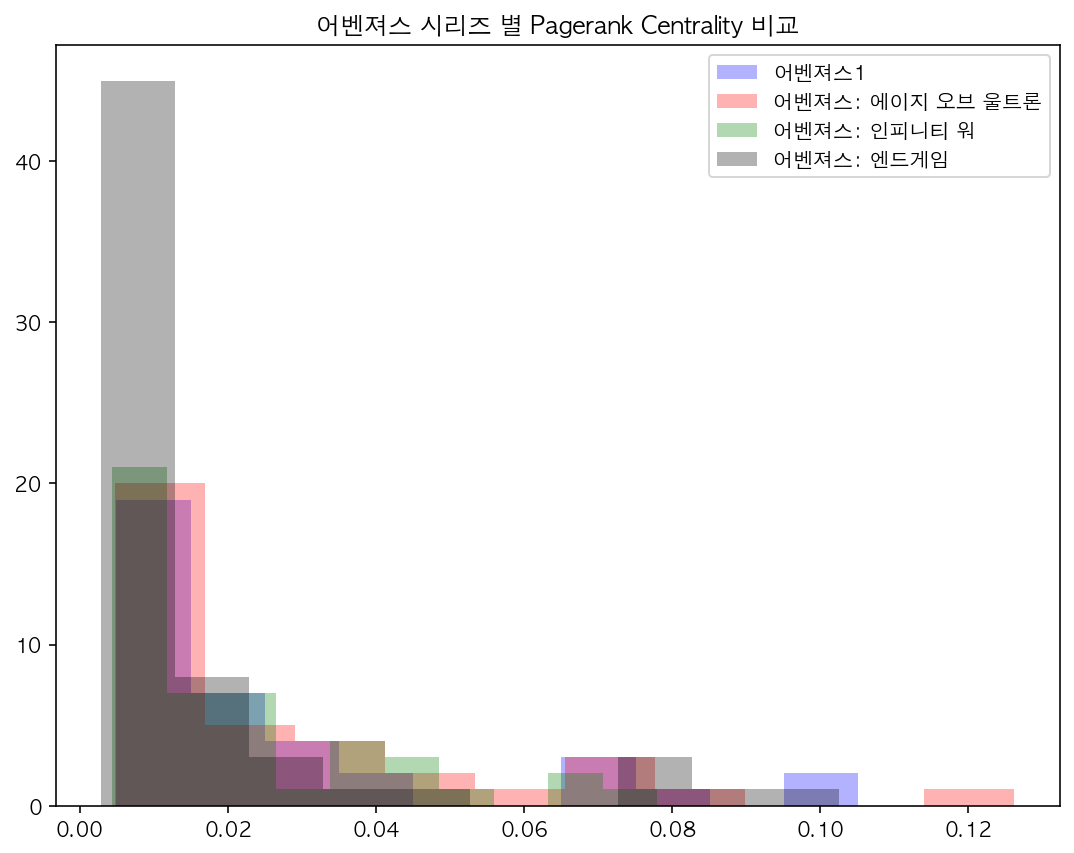

In [20]:
plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지

plt.figure(figsize=(9,7))
plt.title("어벤져스 시리즈 별 Pagerank Centrality 비교", fontsize=12)
plt.hist(dict(pagerank(graphs[0])).values(), bins=10, alpha=0.3, color="b", label="어벤져스1")
plt.hist(dict(pagerank(graphs[1])).values(), bins=10, alpha=0.3, color="r", label="어벤져스: 에이지 오브 울트론")
plt.hist(dict(pagerank(graphs[2])).values(), bins=10, alpha=0.3, color="g", label="어벤져스: 인피니티 워")
plt.hist(dict(pagerank(graphs[3])).values(), bins=10, alpha=0.3, color="k", label="어벤져스: 엔드게임")
plt.legend()
plt.show()

- 시리즈를 막론하고 소수의 캐릭터만이 노드간의 연결에서 핵심적인 역할을 하는 것을 확인할 수 있습니다.

# 분석3: 캐릭터의 중요도 변화

---

어벤져스는 시리즈물이기 때문에 각 시리즈에서 핵심적인 역할을 하는 주인공과 비슷한 캐릭터가 항상 있습니다. 캐릭터들의 중요도는 시리즈 별로 변화할 수 밖에 없는데요, 예를 들어 에이지 오브 울트론의 메인 빌런인 울트론은 나머지 시리즈에서는 전혀 등장하지 않습니다. 이러한 점에 착안하여 이번에는 캐릭터들의 중요도 변화 추이를 시리즈 순서대로 파악해보도록 합시다.

중요도를 측정하는 기준으로는 앞서 사용했던 pagerank centrality를 사용하도록 하겠습니다. 그 이유는 데이터의 엣지 가중치가 단순히 인물간의 대화 횟수를 기준으로 집계된 것이기 때문에 degree centrality를 사용하기 보다는 등장횟수에 패널티를 건 pagerank를 사용하는 것이 더 합리적일 것이라고 생각했기 때문입니다.

## 중요도 데이터프레임

In [21]:
# 중요도 데이터프레임 정의
importance = [dict(pagerank(graph)) for graph in graphs]
importance_df = pd.DataFrame.from_records(importance).fillna(0)
importance_df

,NICK FURY,CAPTAIN AMERICA,LOKI,COULSON,THOR,BLACK WIDOW,BRUCE BANNER,SENATOR BOYNTON,SELVIG,HAWKEYE,...,THE WASP,HYDRA AGENT,EVERYONE,ASGARDIAN SOLDIER (2013),BRUCE ROGERS,EDWIN JARVIS,CASSIE LANG,BOY,RONIN,HOPE VAN DYNE
0,0.105124,0.104435,0.084097,0.074012,0.071516,0.065968,0.041672,0.038407,0.030788,0.030187,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.035457,0.126228,0.000000,0.000000,0.058555,0.052130,0.069422,0.000000,0.011931,0.065894,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.021277,0.036649,0.009699,0.000000,0.044279,0.028900,0.046046,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.075967,0.004322,0.000000,0.079822,0.050445,0.088903,0.000000,0.000000,0.035279,...,0.003724,0.003536,0.003365,0.003335,0.003289,0.003285,0.003277,0.003273,0.003033,0.002898


## 캡틴아메리카, 아이언맨, 타노스, 스타로드

In [22]:
# 캡틴아메리카, 아이언맨, 타노스, 스타로드의 중요도
importance_df[['CAPTAIN AMERICA', 'IRON MAN', "BLACK WIDOW", 'THANOS', "STAR-LORD"]]

,CAPTAIN AMERICA,IRON MAN,BLACK WIDOW,THANOS,STAR-LORD
0,0.104435,0.027110,0.065968,0.000000,0.000000
1,0.126228,0.086123,0.052130,0.000000,0.000000
2,0.036649,0.077972,0.028900,0.068142,0.064785
3,0.075967,0.102579,0.050445,0.021330,0.013313


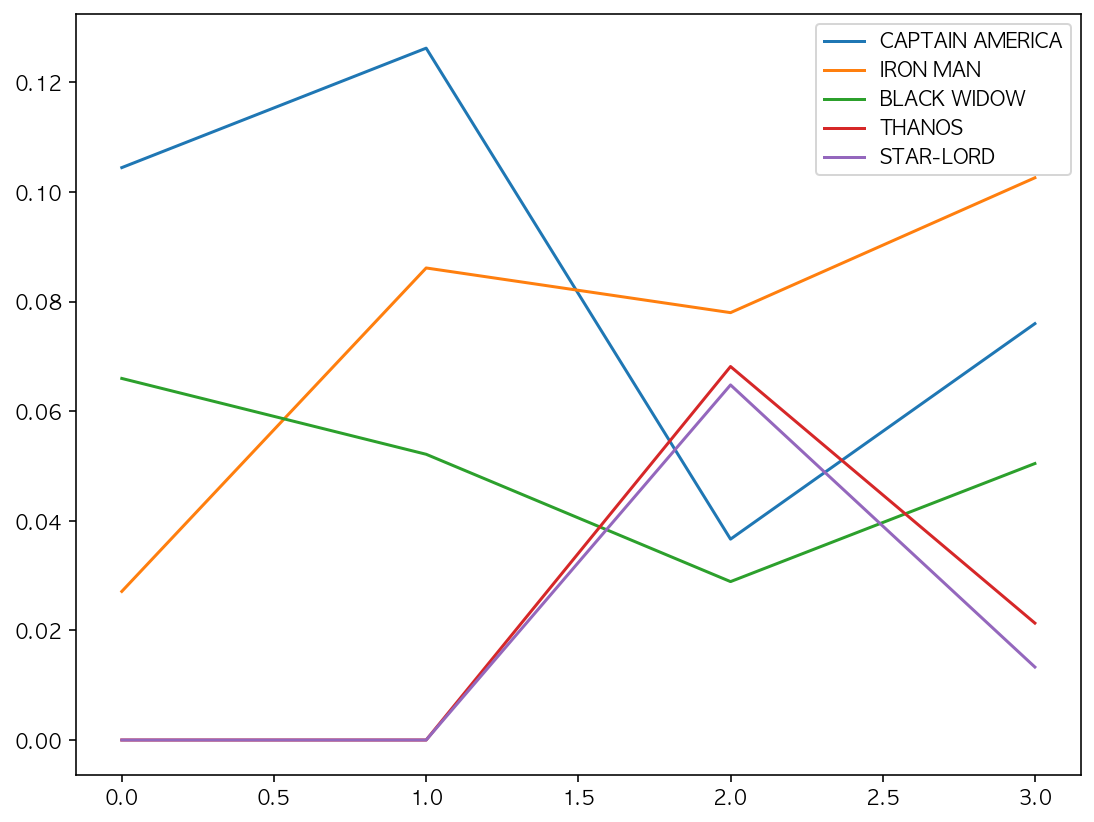

In [23]:
importance_df[['CAPTAIN AMERICA', 'IRON MAN', "BLACK WIDOW", 
               'THANOS', "STAR-LORD"]].plot(figsize=(9,7))
plt.show()

## Top7 캐릭터

In [24]:
# 각 시리즈별 중요도 top7 캐릭터 추출
important_characters = set()
for i in range(4):
    important_characters |= set(list(importance_df.T[i].sort_values(ascending=False)[0:7].index))
    
important_characters

{'ANTMAN',
 'BLACK WIDOW',
 'BRUCE BANNER',
 'CAPTAIN AMERICA',
 'COULSON',
 'DOCTOR STRANGE',
 'GAMORA',
 'HAWKEYE',
 'IRON MAN',
 'LOKI',
 'NICK FURY',
 'STAR-LORD',
 'THANOS',
 'THOR',
 'ULTRON'}

In [25]:
importance_df[list(important_characters)]

,IRON MAN,BRUCE BANNER,GAMORA,COULSON,DOCTOR STRANGE,LOKI,CAPTAIN AMERICA,ULTRON,ANTMAN,NICK FURY,THANOS,THOR,HAWKEYE,BLACK WIDOW,STAR-LORD
0,0.027110,0.041672,0.000000,0.074012,0.000000,0.084097,0.104435,0.000000,0.000000,0.105124,0.000000,0.071516,0.030187,0.065968,0.000000
1,0.086123,0.069422,0.000000,0.000000,0.000000,0.000000,0.126228,0.077326,0.000000,0.035457,0.000000,0.058555,0.065894,0.052130,0.000000
2,0.077972,0.046046,0.044219,0.000000,0.048705,0.009699,0.036649,0.000000,0.000000,0.021277,0.068142,0.044279,0.000000,0.028900,0.064785
3,0.102579,0.088903,0.012517,0.000000,0.005108,0.004322,0.075967,0.000000,0.077447,0.000000,0.021330,0.079822,0.035279,0.050445,0.013313


## 시각화

In [26]:
importance_df.T[0].sort_values(ascending=False)[0:7]

NICK FURY          0.105124
CAPTAIN AMERICA    0.104435
LOKI               0.084097
COULSON            0.074012
THOR               0.071516
BLACK WIDOW        0.065968
BRUCE BANNER       0.041672
Name: 0, dtype: float64

In [27]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

def plot_importances(graphs):
    sns.set(rc={'figure.figsize':(10,7)})
    plt.rcParams['font.family'] = 'AppleGothic'   # 한글 깨짐 방지
    
    # 중요도 데이터프레임 정의
    importance = [dict(pagerank(graph)) for graph in graphs]
    importance_df = pd.DataFrame.from_records(importance).fillna(0)

    # 각 시리즈별 중요도 top7 캐릭터 추출
    important_characters = set()
    for i in range(4):
        important_characters |= set(list(importance_df.T[i].sort_values(ascending=False)[0:7].index))
        
    sns.lineplot(data=importance_df[important_characters],
                 palette="hls", dashes=False, linewidth=3).set_title("주요 캐릭터 중요도 변화")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # 범례 밖으로 빼기
    plt.show()

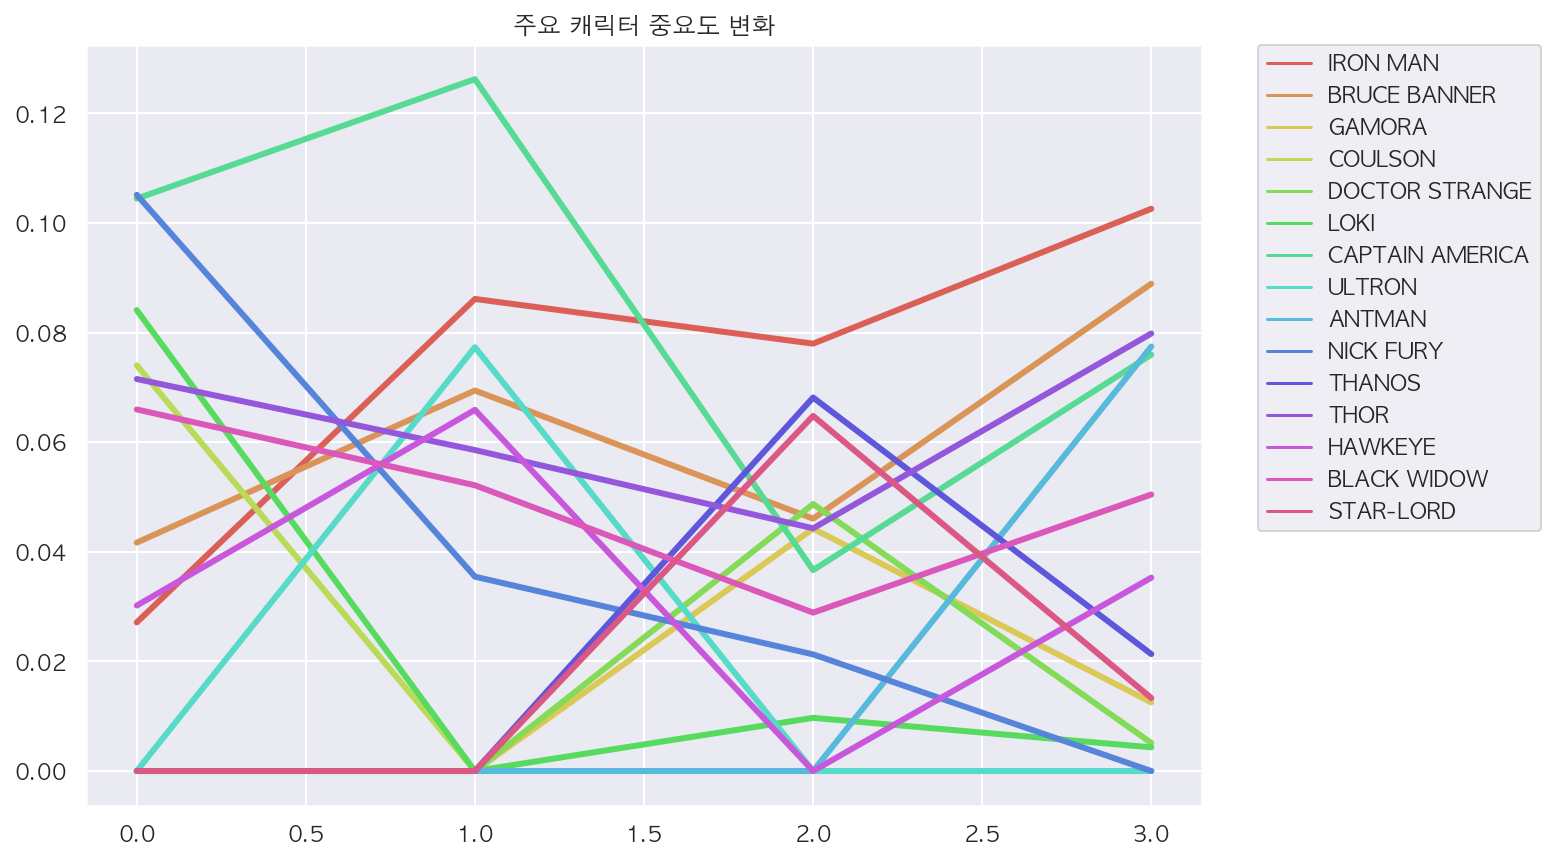

In [28]:
plot_importances(graphs)

# 분석 4: 캐릭터 그룹핑

---

앞서 정의한 네트워크에서 인물들 간의 관계를 그룹핑할 수 있지 않을까요? 특정한 네트워크 안에서 내부적으로 정의되는 소규모 그룹들을 community라고 합니다. community를 정의하는 알고리즘은 여러개가 있지만, 여기서는 그 중에서 louvain community detection 방법을 사용해서 캐릭터 간의 그룹을 분류해보도록 하겠습니다.

In [29]:
#!pip install python-louvain

In [30]:
from community import community_louvain

In [31]:
partition = community_louvain.best_partition(graphs[2])
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(graphs[2])
size

5.0

In [32]:
partition.keys()

dict_keys(['ROCKET', 'THOR', 'IRON MAN', 'DOCTOR STRANGE', 'SPIDERMAN', 'THANOS', 'GAMORA', 'STAR-LORD', 'DRAX', 'MANTIS', 'NICK FURY', 'MARIA HILL', 'WONG', 'OKOYE', 'BLACK PANTHER', 'BRUCE BANNER', 'BLACK WIDOW', 'SECRETARY ROSS', 'JAMES RHODES', 'EBONY MAW', 'COLLECTOR', 'STONEKEEPER', 'LOKI', 'RED SKULL', 'EITRI', 'BUCKY BARNES', 'CAPTAIN AMERICA', 'VISION', 'HULK', 'FRIDAY', 'PROXIMA MIDNIGHT', 'SHURI', 'WANDA MAXIMOFF', 'FALCON', 'NEBULA', 'CULL OBSIDIAN', 'DOME CONTROL', "M'BAKU", 'GROOT', 'PEPPER', 'CORVUS GLAIVE', 'JABARI WARRIORS', "GAMORA'S MOTHER", 'CHILD OF THANOS', 'NED LEEDS', 'STAN LEE', 'HEIMDALL'])

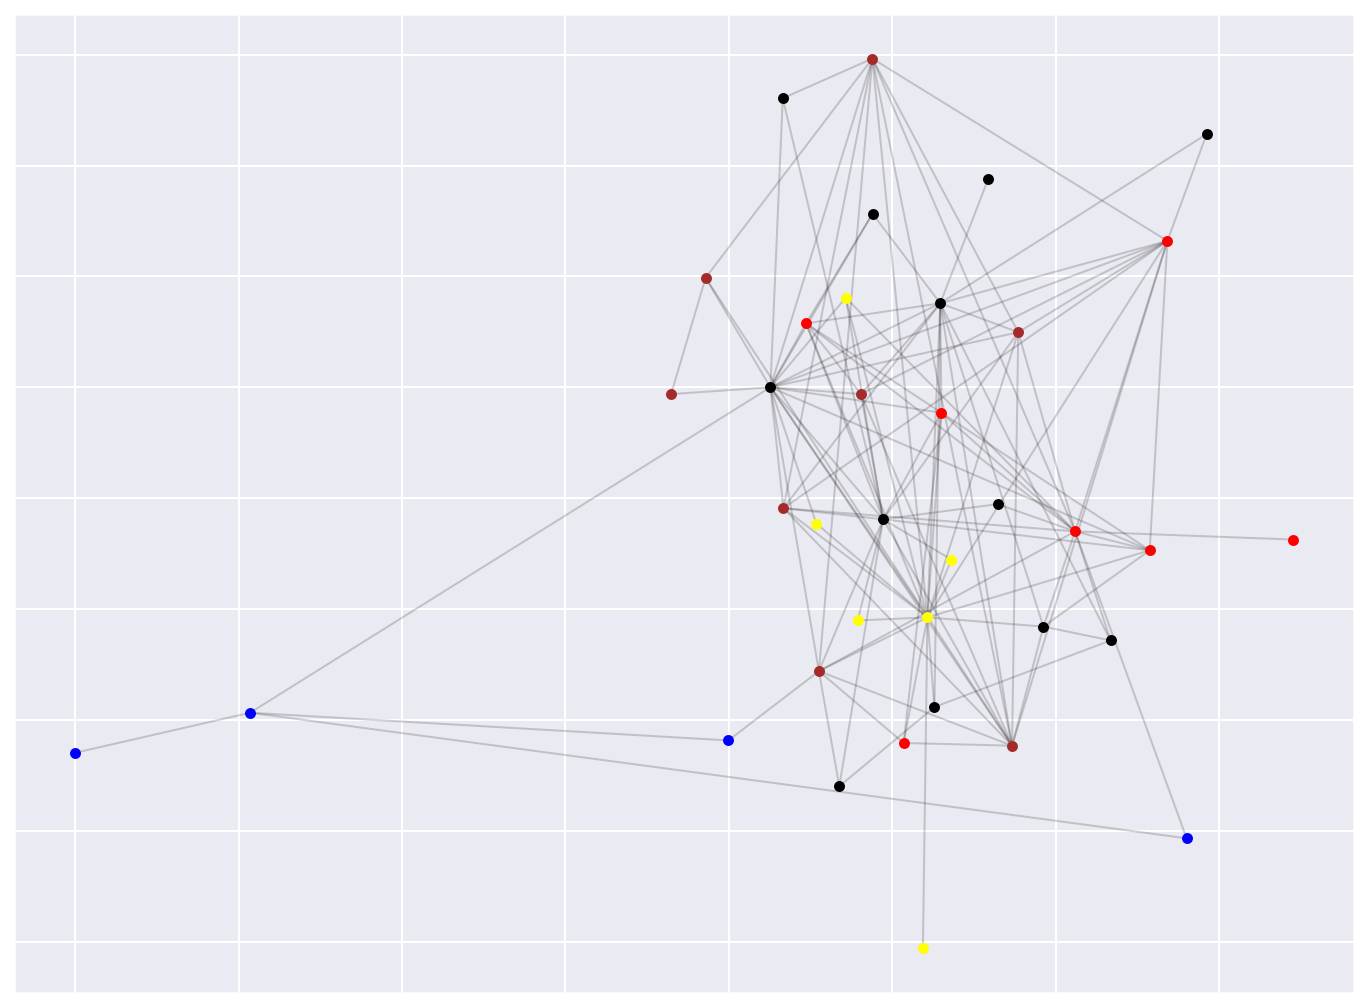

In [33]:
from community import community_louvain
plt.figure(figsize=(12, 9))

partition = community_louvain.best_partition(graphs[1])
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(graphs[1])
count = 0
colors = ['red', 'blue', 'yellow', 'black', 'brown']

for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(graphs[0], pos, list_nodes, node_size = 20, node_color = colors[count])
    count = count + 1

nx.draw_networkx_edges(graphs[1], pos, alpha=0.2)
plt.show()

In [34]:
sorted(partition.items(), key=lambda x:x[1])

[('IRON MAN', 0),
 ('BRUCE BANNER', 0),
 ('NICK FURY', 0),
 ('JAMES RHODES', 0),
 ('MARIA HILL', 0),
 ('SPECIALIST CAMERON KLEIN', 0),
 ('WORLD HUB TECH', 0),
 ('STRUCKER', 1),
 ('DR. LIST', 1),
 ('FORTRESS SOLDIER', 1),
 ('SOLDIERS', 1),
 ('HAWKEYE', 2),
 ('LAURA BARTON', 2),
 ("BARTON'S DAUGHTER", 2),
 ('IRON LEGION', 2),
 ('BALLET INSTRUCTOR', 2),
 ('LILA BARTON', 2),
 ('BLACK WIDOW', 3),
 ('CAPTAIN AMERICA', 3),
 ('THOR', 3),
 ('SELVIG', 3),
 ('FALCON', 3),
 ('MADAME B', 3),
 ('FRIDAY', 3),
 ('STAN LEE', 3),
 ('HEIMDALL', 3),
 ('PEGGY CARTER', 3),
 ('ZRINKA', 3),
 ('PARTY GUEST', 3),
 ('WANDA MAXIMOFF', 4),
 ('ULTRON', 4),
 ('PIETRO MAXIMOFF', 4),
 ('JARVIS', 4),
 ('VISION', 4),
 ('DR. HELEN CHO', 4),
 ('ULYSSES KLAUE', 4),
 ("KLAUE'S MERCENARY", 4)]